In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, ReLU, BatchNormalization,Add, AveragePooling1D, Flatten, Dense
from tensorflow.keras.losses import mean_squared_error, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow import Tensor

pd.options.display.max_columns = 100

In [986]:
def create_sequential_model(df):
    input_shape = len(df[0])
    
    model = tf.keras.Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,), kernel_initializer="glorot_uniform"),
        Dropout(0.5),
        Dense(128, activation='tanh'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(64, activation='tanh'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(32, activation='tanh'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')  # Output layer with linear activation
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=["mae", "msle"])

    return model

In [987]:
# def relu_bn(inputs: Tensor) -> Tensor:
#     relu = ReLU()(inputs)
#     bn = BatchNormalization()(relu)
#     return bn

# def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor:
#     y = Conv1D(kernel_size=kernel_size,
#                strides= (1 if not downsample else 2),
#                filters=filters,
#                padding="same")(x)
#     y = relu_bn(y)
#     y = Dropout(.6)(y)
#     y = Conv1D(kernel_size=kernel_size,
#                strides=1,
#                filters=filters,
#                padding="same")(y)
#     if downsample:
#         x = Conv1D(kernel_size=1,
#                    strides=2,
#                    filters=filters,
#                    padding="same")(x)
#     out = Add()([x, y])
#     out = relu_bn(out)
#     out = Dropout(.6)(out)
    
#     return out

# def create_res_net():
    
#     inputs = Input(shape=(X_train.shape[1],1))
#     num_filters = 64
    
#     t = BatchNormalization()(inputs)
#     t = Conv1D(kernel_size=3,
#                strides=1,
#                filters=num_filters,
#                padding="same")(inputs)
#     t = relu_bn(t)
#     t = Dropout(.6)(t)
    
#     num_blocks_list = [2, 5, 5, 2]
#     for i in range(len(num_blocks_list)):
#         num_blocks = num_blocks_list[i]
#         for j in range(num_blocks):
#             t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
#         num_filters *= 2
#     t = AveragePooling1D(3)(t)
#     t = Flatten()(t)
#     t = Dense(64, activation="relu", kernel_initializer="glorot_uniform")(inputs)
#     f1 = Dense(32, activation="relu")(t)
#     f2 = Dense(16, activation="relu")(f1)
#     f3 = Dense(8, activation="relu")(f2)
#     outputs = Dense(1, activation='linear')(f3)
#     model = Model(inputs, outputs)
#     model.compile(
#         optimizer=Adam(learning_rate=0.0001),
#         loss='mean_squared_error',
#         metrics=['accuracy']
#     )
#     return model    

In [988]:
def meld_acc(df, meld_column):
    mortality_rate = []

    bracket_1_deceased = df[(df[meld_column] <= 9) & (df["Deceased"] == 1)]
    bracket_1_nondeceased = df[(df[meld_column] <= 9) & (df["Deceased"] == 0)]

    bracket_2_deceased = df[(df[meld_column] <= 20) & (df[meld_column] > 9) & (df["Deceased"] == 1)]
    bracket_2_nondeceased = df[(df[meld_column] <= 20) & (df[meld_column] > 9) & (df["Deceased"] == 0)]

    bracket_3_deceased = df[(df[meld_column] <= 30) & (df[meld_column] > 20) & (df["Deceased"] == 1)]
    bracket_3_nondeceased = df[(df[meld_column] <= 30) & (df[meld_column] > 20) & (df["Deceased"] == 0)]

    bracket_4_deceased = df[(df[meld_column] <= 40) & (df[meld_column] > 30) & (df["Deceased"] == 1)]
    bracket_4_nondeceased = df[(df[meld_column] <= 40) & (df[meld_column] > 30) & (df["Deceased"] == 0)]

    bracket_5_deceased = df[(df[meld_column] > 40) & (df["Deceased"] == 1)]
    bracket_5_nondeceased = df[(df[meld_column] > 40) & (df["Deceased"] == 0)]

    try:
        bracket_1_mortality_rate = len(bracket_1_deceased) / (len(bracket_1_deceased) + len(bracket_1_nondeceased))
    except ZeroDivisionError:
        bracket_1_mortality_rate = 0
    
    try:
        bracket_2_mortality_rate = len(bracket_2_deceased) / (len(bracket_2_deceased) + len(bracket_2_nondeceased))
    except ZeroDivisionError:
        bracket_2_mortality_rate = 0

    try:
        bracket_3_mortality_rate = len(bracket_3_deceased) / (len(bracket_3_deceased) + len(bracket_3_nondeceased))
    except ZeroDivisionError:
        bracket_3_mortality_rate = 0

    try:
        bracket_4_mortality_rate = len(bracket_4_deceased) / (len(bracket_4_deceased) + len(bracket_4_nondeceased))
    except ZeroDivisionError:
        bracket_4_mortality_rate = 0

    try:
        bracket_5_mortality_rate = len(bracket_5_deceased) / (len(bracket_5_deceased) + len(bracket_5_nondeceased))
    except ZeroDivisionError:
        bracket_5_mortality_rate = 0

    mortality_rate.append(bracket_1_mortality_rate)
    mortality_rate.append(bracket_2_mortality_rate)
    mortality_rate.append(bracket_3_mortality_rate)
    mortality_rate.append(bracket_4_mortality_rate)
    mortality_rate.append(bracket_5_mortality_rate)

    return mortality_rate

In [989]:
# read in data
df = pd.read_csv("liverData/eldd.csv")

In [990]:
# print length and show sample data
print(len(df))
df.head()

654


,Age,Sex,DaysAtRisk,Deceased,LTx,Cirrhosis,ALF,Ethyltoxic,HBV,HCV,AIH,PBC,PSC,NASH,Cryptogenic,Dialysis,GIB,HCC,SBP,ALAT_S,ALB_S,AP_S,ASAT_S,B_MPV_E,B_PLT_E,B_WBC_E,BILI_S,BILID_S,CA_S,CHE_S,CHOLG_S,CL_S,CRE_S,CRP_S,CYSC_S,GGT_S,IL6_S,INR_C,NA_S,P_S,PALB_S,PROT_S,PTH_S,VDT_OH_S
0,68,male,200,0,0,1.0,0,1,1,0,0,0,0,0,0,0.0,0,1,0.0,0.29,40.9,1.17,0.56,11.0,160.0,7.4,7.9,3.5,2.17,74.6,3.08,100.3,104,8.20,1.79,1.97,22.87,1.11,135.4,1.49,0.19,69.6,2.39,12.7
1,64,male,3,1,0,1.0,0,1,0,0,0,0,0,0,0,0.0,1,0,0.0,0.22,28.3,3.68,0.66,NaN,10.0,8.1,43.2,26.0,2.04,14.7,2.21,101.9,304,43.54,4.87,2.43,336.50,1.77,133.1,0.96,0.05,62.5,19.39,5.5
2,67,female,208,0,0,1.0,0,1,0,0,0,0,0,0,0,0.0,0,0,0.0,0.19,41.7,1.50,0.68,10.8,123.0,4.9,16.9,6.9,2.33,59.5,5.02,93.8,95,9.88,2.23,1.84,16.74,1.09,137.4,1.14,0.17,80.5,7.39,18.8
3,32,female,17,1,0,0.0,1,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.78,23.8,52.97,3.24,NaN,NaN,NaN,266.5,208.3,2.23,15.4,4.55,95.7,61,90.29,4.73,24.35,709.80,2.29,130.5,1.71,0.15,48.9,2.21,4.5
4,64,female,189,0,0,1.0,0,1,0,0,0,0,0,0,0,0.0,1,0,0.0,0.75,36.3,2.79,1.33,13.9,65.0,6.3,37.2,16.9,2.28,63.8,4.78,100.8,73,8.65,1.51,2.45,7.90,1.10,142.6,1.07,0.11,67.6,4.17,34.1


In [991]:
#meld functions
#https://www.mdcalc.com/calc/10437/model-end-stage-liver-disease-meld#evidence

import math

# TODO: check all SI values and see what needs conversion. Sodium did not, unknown after Bili but placeholder functions added
#convert SI units to US units
#creatinine umol/L to mg/dl
def convertCreatinine(CRE_S):
     return (CRE_S * 0.0230)
#bilirubin umol/L to mg/dl
def convertBilirubin(BILI_S):
     return (BILI_S * 0.0585)
#bilirubin umol/L to mg/dl
def convertCystatinC(BILI_S):
     return (BILI_S * 0.0585)
#bilirubin umol/L to mg/dl
def convertIL_6(BILI_S):
     return (BILI_S * 0.0585)
#bilirubin umol/L to mg/dl
def convertWBC(BILI_S):
     return (BILI_S * 0.0585)
#bilirubin umol/L to mg/dl
def convertProtien(BILI_S):
     return (BILI_S * 0.0585)
def convertAlbumin(BILI_S):
     return (BILI_S * 0.0585)
def convertALAT(BILI_S):
     return (BILI_S * 0.0585)
def convertASAT(BILI_S):
     return (BILI_S * 0.0585)

#meld3
#1.33*(Female) + 4.56*ln(Serum bilirubin) + 0.82*(137 - Sodium) – 0.24*(137 - Sodium)*ln(Serum bilirubin) + 9.09*ln(INR) + 11.14*ln(Serum creatinine) + 1.85*(3.5 – Serum albumin) – 1.83*(3.5 – Serum albumin)*ln(Serum creatinine) + 6,
#rounded to the nearest integer
#Serum bilirubin, INR, and serum creatinine values below 1.0 are set to 1.0.
#Sodium is limited to a range of 125-137 mEq/L, and if outside of these bounds, is set to the nearest limit.
#Serum albumin is limited to a range of 1.5-3.5 g/dL, and if outside of these bounds, is set to the nearest limit.
#Maximum serum creatinine is 3.0 mg/dL, and if above this bound, is set to 3.0 mg/dL.

def calm_meld(CRE_S, BILI_S, INR_C):
    meld_score = (0.957*math.log(convertCreatinine(CRE_S)) + 0.378*math.log(convertBilirubin(BILI_S)) + 1.120*math.log(INR_C) + 0.643)*10
    return int(round(meld_score))

def calc_meld3(CRE_S, BILI_S, INR_C, NA_S, ALB_S, sex):
    BILI_S = convertBilirubin(BILI_S)
    CRE_S = convertCreatinine(CRE_S)
    if BILI_S < 1:
        BILI_S = 1
    if INR_C < 1:
        INR_C = 1
    if CRE_S < 1:
        CRE_S = 1
    if CRE_S >= 3:
        CRE_S = 3
    if NA_S > 137:
        NA_S = 137
    if NA_S < 125:
        NA_S = 125
    if ALB_S > 3.5:
        ALB_S = 3.5
    if ALB_S < 1.5:
        ALB_S = 1.5
    if sex == 'female':
        sex = 1
    else:
        sex = 0
    
    meld3_score = 1.33*(sex) + 4.56*math.log(BILI_S) + 0.82*(137 - NA_S) - 0.24*(137 - NA_S)*math.log(BILI_S) + 9.09*math.log(INR_C) + 11.14*math.log(CRE_S) + 1.85*(3.5 - ALB_S) - 1.83*(3.5 - ALB_S)*math.log(CRE_S) + 6
    return int(round(meld3_score))

#meld_na
#MELD(i) = 0.957*ln(Creatinine) + 0.378*ln(Bilirubin) + 1.120*ln(INR) + 0.643
#Then, round to the tenth decimal place and multiply by 10. 
#If MELD(i) > 11, perform additional MELD calculation as follows:
#MELD = MELD(i) + 1.32*(137 – Na) –  [0.033*MELD(i)*(137 – Na)]

def calc_meldNA(CRE_S, BILI_S, INR_C,NA_S):
    meldNA_score = 0.957 * math.log(convertCreatinine(CRE_S)) + 0.378*math.log(convertBilirubin(BILI_S)) + 1.120*math.log(INR_C) + 0.643
    meldNA_score = round(meldNA_score, 1) * 10
    if meldNA_score > 11:
        meldNA_score = meldNA_score + 1.32*(137-NA_S) - (0.033*meldNA_score*(137-NA_S))
    return int(round(meldNA_score))


In [992]:
#Data preprocessing
#drop NA rows to allow for meld scores. 654 down to 638
df = df.dropna(subset=['INR_C','NA_S','ALB_S'])

#TODO: convert SI to metric as necessary
#US hospital labs are in metric is why we're converting here.


In [993]:
df2 = df.copy(deep=True).reset_index(drop=True)
df2['MELD'] = df2.apply(lambda row: calm_meld(row["CRE_S"],row["BILI_S"],row["INR_C"]), axis =1)
df2['MELD3'] = df2.apply(lambda row: calc_meld3(row["CRE_S"],row["BILI_S"],row["INR_C"],row["NA_S"],row["ALB_S"],row["Sex"]), axis =1)
df2['MELDNA'] = df2.apply(lambda row: calc_meldNA(row["CRE_S"],row["BILI_S"],row["INR_C"],row["NA_S"]), axis =1)


In [994]:
# one-hot encode Sex
col = pd.get_dummies(df2['Sex'])
del df2['Sex']
df2 = df2.join(col)

# take out MELD score comparisons for final_df
final_df = df2.copy(deep=True)

# Assumption: all null numeric values are 0
final_df = final_df.replace(np.NaN, 0)

final_df_normalized = final_df.copy(deep=True)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
feature_scaler = StandardScaler()
target_scaler = StandardScaler()
non_binary_cols = [col for col in final_df.columns if len(final_df[col].unique()) > 2]
non_binary_cols.remove("MELD")
non_binary_cols.remove("MELD3")
non_binary_cols.remove("MELDNA")
binary_cols = [col for col in final_df.columns if len(final_df[col].unique()) <= 2]
# final_df_normalized = pd.DataFrame(scaler.fit_transform(final_df[non_binary_cols]), columns=non_binary_cols)
# final_df_normalized = pd.concat([final_df[binary_cols], final_df_normalized], axis=1)

In [995]:
from sklearn.model_selection import train_test_split

#Goal of improving on original meld for now. 
#Meld3 is used primarily for transplant, meldNA is used for Cirrhosis: #https://www.mdcalc.com/calc/10437/model-end-stage-liver-disease-meld#evidence
y = final_df_normalized['MELD'].copy(deep=True)
y = target_scaler.fit_transform(np.array(y).reshape(-1, 1))

#Trim columns to use for training
#Removing days at risk, deceased, 
#fields = ['Age','Sex','Cirrhosis','ALF','Ethyltoxic','HBV','HCV','INR_C','NA_S','P_S','','','','']
X = final_df_normalized.copy(deep=True)
X = X.drop(["MELD", "MELD3", "MELDNA"], axis=1)
X_non_binary = pd.DataFrame(feature_scaler.fit_transform(X[non_binary_cols]), columns=non_binary_cols)
X = pd.concat([X[binary_cols], X_non_binary], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [996]:
# initialize and fit sequential model
sequential_model = create_sequential_model(df=X_train)
sequential_model.fit(x=X_train,
    y=y_train,
    epochs=500,
    verbose=1,
    validation_data=(X_test, y_test),
    batch_size=32)

Epoch 1/500
16/16 [==============================] - 1s 12ms/step - loss: 0.9328 - mae: 0.7374 - msle: 0.1565 - val_loss: 0.8887 - val_mae: 0.7198 - val_msle: 0.1733
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 0.7138 - mae: 0.6286 - msle: 0.1166 - val_loss: 0.4532 - val_mae: 0.5045 - val_msle: 0.0599
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4567 - mae: 0.5175 - msle: 0.0744 - val_loss: 0.3336 - val_mae: 0.4412 - val_msle: 0.0443
Epoch 4/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4091 - mae: 0.4904 - msle: 0.0631 - val_loss: 0.2795 - val_mae: 0.4021 - val_msle: 0.0326
Epoch 5/500
16/16 [==============================] - 0s 5ms/step - loss: 0.3488 - mae: 0.4369 - msle: 0.0495 - val_loss: 0.2308 - val_mae: 0.3682 - val_msle: 0.0256
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 0.3116 - mae: 0.4278 - msle: 0.0439 - val_loss: 0.2077 - val_mae: 0.3504 - val_msle: 0.0241
Epoch 7/5

In [997]:
# predict out values
y_pred_seq = sequential_model.predict(X_test)

# reverse scaling
y_pred_seq = np.round(target_scaler.inverse_transform(np.array(y_pred_seq)))
y_test = np.round(target_scaler.inverse_transform(np.array(y_test)))


(array([ 5.,  5., 10., 17., 12., 17., 11.,  9.,  7., 11.,  3.,  9.,  4.,
         0.,  2.,  2.,  0.,  2.,  1.,  1.]),
 array([ 3.  ,  5.35,  7.7 , 10.05, 12.4 , 14.75, 17.1 , 19.45, 21.8 ,
        24.15, 26.5 , 28.85, 31.2 , 33.55, 35.9 , 38.25, 40.6 , 42.95,
        45.3 , 47.65, 50.  ]),
 <BarContainer object of 20 artists>)

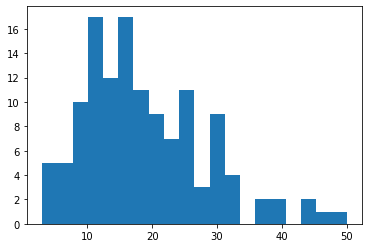

In [998]:
plt.hist(np.array(y_test), bins=20)

(array([ 7.,  6.,  5., 12., 15.,  5., 22.,  5.,  4., 10.,  7.,  3., 10.,
         4.,  2.,  1.,  6.,  1.,  1.,  2.]),
 array([ 6.  ,  7.65,  9.3 , 10.95, 12.6 , 14.25, 15.9 , 17.55, 19.2 ,
        20.85, 22.5 , 24.15, 25.8 , 27.45, 29.1 , 30.75, 32.4 , 34.05,
        35.7 , 37.35, 39.  ], dtype=float32),
 <BarContainer object of 20 artists>)

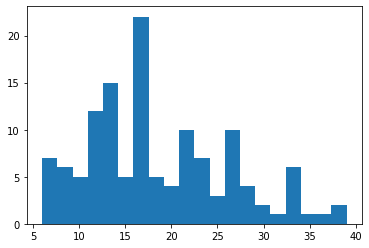

In [999]:
plt.hist(y_pred_seq, bins=20)

In [1000]:
meld_predictions = pd.concat([pd.DataFrame(data=np.array(X_test), columns=X.columns), pd.DataFrame(data=np.array(y_pred_seq), columns=["MELD_Prediction"])], axis=1)

In [1001]:
prediction_accuracy = meld_acc(meld_predictions, meld_column="MELD_Prediction")
MELD_acc = meld_acc(final_df_normalized, meld_column="MELD")
MELD3_acc = meld_acc(final_df_normalized, meld_column="MELD3")
MELDNA_acc = meld_acc(final_df_normalized, meld_column="MELDNA")

In [1002]:
prediction_accuracy

[0.07692307692307693,
 0.014705882352941176,
 0.3333333333333333,
 0.7272727272727273,
 0]

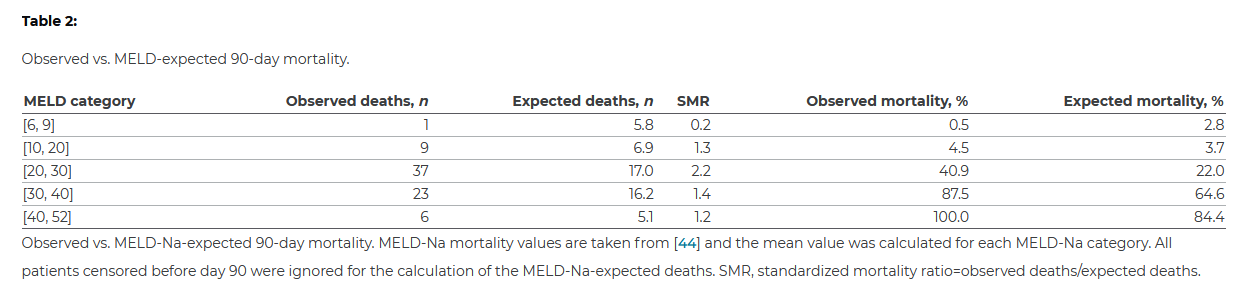

Note: Observed Mortality % is the model prediction, Expected is the baseline to measure against

In [1003]:
from sklearn.decomposition import PCA

In [1004]:
pca = PCA(n_components=12)
scaler = StandardScaler()
X = final_df_normalized.copy(deep=True)
X = X.drop(["MELD", "MELD3", "MELDNA"], axis=1)
non_binary_cols_pca = [col for col in X.columns if len(X[col].unique()) > 2]
binary_cols_pca = [col for col in X.columns if len(X[col].unique()) <= 2]
X_non_binary_pca = pd.DataFrame(scaler.fit_transform(X[non_binary_cols_pca]), columns=non_binary_cols_pca)
X_non_binary_pca = pd.DataFrame(pca.fit_transform(X_non_binary_pca))
X_pca = pd.concat([X[binary_cols_pca], X_non_binary_pca], axis=1)
# X_pca = X_pca.drop(["MELD", "MELD3", "MELDNA"], axis=1)
# X_pca = pca.fit_transform(X)

In [1005]:
sum(pca.explained_variance_ratio_)

0.7943800849819396

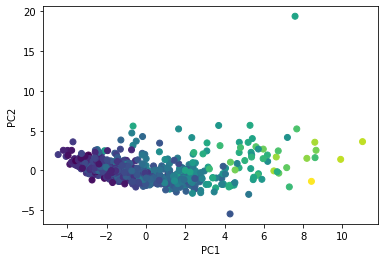

In [1006]:
plt.scatter(X_pca[0], X_pca[1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [1007]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=7)
X_train_pca = tf.convert_to_tensor(X_train_pca)
X_test_pca = tf.convert_to_tensor(X_test_pca)
y_train_pca = tf.convert_to_tensor(y_train_pca)
y_test_pca = tf.convert_to_tensor(y_test_pca)

In [1008]:
# initialize and fit sequential model
sequential_model_pca = create_sequential_model(df=X_train_pca)
sequential_model_pca.fit(x=X_train_pca,
    y=y_train_pca,
    epochs=500,
    verbose=1,
    validation_data=(X_test_pca, y_test_pca),
    batch_size=32)

Epoch 1/500
16/16 [==============================] - 1s 12ms/step - loss: 0.9677 - mae: 0.7500 - msle: 0.1832 - val_loss: 1.1587 - val_mae: 0.8406 - val_msle: 0.2391
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 0.9357 - mae: 0.7352 - msle: 0.1771 - val_loss: 1.0575 - val_mae: 0.7944 - val_msle: 0.2103
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 0.8179 - mae: 0.6751 - msle: 0.1526 - val_loss: 0.7974 - val_mae: 0.6580 - val_msle: 0.1490
Epoch 4/500
16/16 [==============================] - 0s 6ms/step - loss: 0.6004 - mae: 0.5626 - msle: 0.1036 - val_loss: 0.5412 - val_mae: 0.5245 - val_msle: 0.0715
Epoch 5/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4662 - mae: 0.5063 - msle: 0.0663 - val_loss: 0.4284 - val_mae: 0.4767 - val_msle: 0.0514
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 0.3925 - mae: 0.4753 - msle: 0.0578 - val_loss: 0.3597 - val_mae: 0.4388 - val_msle: 0.0405
Epoch 7/5

In [1009]:
# predict out values
y_pred_seq_pca = sequential_model_pca.predict(X_test_pca)

# reverse scaling
y_pred_seq_pca = np.round(target_scaler.inverse_transform(np.array(y_pred_seq_pca)))
y_test_pca = np.round(target_scaler.inverse_transform(np.array(y_test_pca)))


(array([ 5.,  5., 10., 17., 12., 17., 11.,  9.,  7., 11.,  3.,  9.,  4.,
         0.,  2.,  2.,  0.,  2.,  1.,  1.]),
 array([ 3.  ,  5.35,  7.7 , 10.05, 12.4 , 14.75, 17.1 , 19.45, 21.8 ,
        24.15, 26.5 , 28.85, 31.2 , 33.55, 35.9 , 38.25, 40.6 , 42.95,
        45.3 , 47.65, 50.  ]),
 <BarContainer object of 20 artists>)

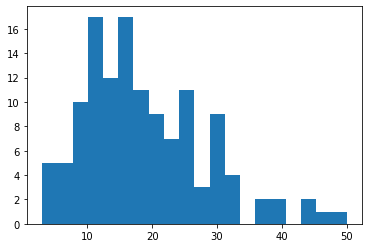

In [1010]:
plt.hist(np.array(y_test_pca), bins=20)

(array([15.,  9., 12., 17., 15.,  9., 12.,  9., 10.,  3.,  3.,  1.,  4.,
         2.,  1.,  2.,  1.,  1.,  1.,  1.]),
 array([ 7.  ,  9.05, 11.1 , 13.15, 15.2 , 17.25, 19.3 , 21.35, 23.4 ,
        25.45, 27.5 , 29.55, 31.6 , 33.65, 35.7 , 37.75, 39.8 , 41.85,
        43.9 , 45.95, 48.  ], dtype=float32),
 <BarContainer object of 20 artists>)

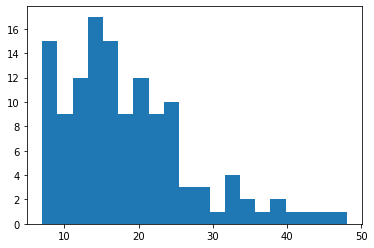

In [1011]:
plt.hist(y_pred_seq_pca, bins=20)

In [1012]:
meld_predictions_pca = pd.concat([pd.DataFrame(data=np.array(X_test_pca), columns=X_pca.columns), pd.DataFrame(data=np.array(y_pred_seq_pca), columns=["MELD_Prediction_PCA"])], axis=1)

In [1013]:
prediction_accuracy_pca = meld_acc(meld_predictions_pca, meld_column="MELD_Prediction_PCA")
prediction_accuracy_pca

[0.0, 0.029850746268656716, 0.3125, 0.7, 0.75]

In [1014]:
import umap
umap_scaler = umap.UMAP(n_neighbors=10, min_dist=0.1, random_state=7)
# embedding = umap_scaler.fit_transform(X)


scaler = StandardScaler()
X = final_df_normalized.copy(deep=True)
X = X.drop(["MELD", "MELD3", "MELDNA"], axis=1)
non_binary_cols_umap = [col for col in X.columns if len(X[col].unique()) > 2]
binary_cols_umap = [col for col in X.columns if len(X[col].unique()) <= 2]
X_non_binary_umap = pd.DataFrame(scaler.fit_transform(X[non_binary_cols_umap]), columns=non_binary_cols_umap)
X_non_binary_umap = pd.DataFrame(umap_scaler.fit_transform(X_non_binary_umap))
X_umap = pd.concat([X[binary_cols_umap], X_non_binary_umap], axis=1)

In [1015]:
X_train_umap, X_test_umap, y_train_umap, y_test_umap = train_test_split(X_umap, y, test_size=0.2, random_state=7)
X_train_umap = tf.convert_to_tensor(X_train_umap)
X_test_umap = tf.convert_to_tensor(X_test_umap)
y_train_umap = tf.convert_to_tensor(y_train_umap)
y_test_umap = tf.convert_to_tensor(y_test_umap)

In [1016]:
# initialize and fit sequential model
sequential_model_umap = create_sequential_model(df=X_train_umap)
sequential_model_umap.fit(x=X_train_umap,
    y=y_train_umap,
    epochs=500,
    verbose=1,
    validation_data=(X_test_umap, y_test_umap),
    batch_size=32)

Epoch 1/500
16/16 [==============================] - 1s 12ms/step - loss: 0.9985 - mae: 0.7710 - msle: 0.1660 - val_loss: 1.1738 - val_mae: 0.8458 - val_msle: 0.2393
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 0.9462 - mae: 0.7553 - msle: 0.1641 - val_loss: 1.1151 - val_mae: 0.8195 - val_msle: 0.2254
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 0.9134 - mae: 0.7397 - msle: 0.1594 - val_loss: 1.0019 - val_mae: 0.7745 - val_msle: 0.1886
Epoch 4/500
16/16 [==============================] - 0s 5ms/step - loss: 0.8419 - mae: 0.7063 - msle: 0.1374 - val_loss: 0.6648 - val_mae: 0.6143 - val_msle: 0.0913
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7408 - mae: 0.6535 - msle: 0.1181 - val_loss: 0.5967 - val_mae: 0.5663 - val_msle: 0.0819
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 0.7104 - mae: 0.6386 - msle: 0.1088 - val_loss: 0.5888 - val_mae: 0.5675 - val_msle: 0.0901
Epoch 7/5

In [1017]:
# predict out values
y_pred_seq_umap = sequential_model_umap.predict(X_test_umap)

# reverse scaling
y_pred_seq_umap = np.round(target_scaler.inverse_transform(np.array(y_pred_seq_umap)))
y_test_umap = np.round(target_scaler.inverse_transform(np.array(y_test_umap)))


(array([ 5.,  5., 10., 17., 12., 17., 11.,  9.,  7., 11.,  3.,  9.,  4.,
         0.,  2.,  2.,  0.,  2.,  1.,  1.]),
 array([ 3.  ,  5.35,  7.7 , 10.05, 12.4 , 14.75, 17.1 , 19.45, 21.8 ,
        24.15, 26.5 , 28.85, 31.2 , 33.55, 35.9 , 38.25, 40.6 , 42.95,
        45.3 , 47.65, 50.  ]),
 <BarContainer object of 20 artists>)

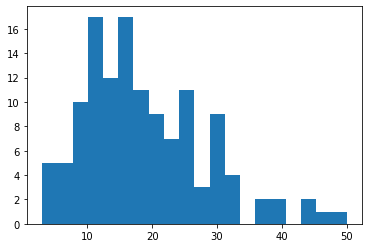

In [1018]:
plt.hist(np.array(y_test_umap), bins=20)

(array([11., 19., 33., 13.,  8.,  6.,  3., 10.,  6.,  6.,  1.,  1.,  5.,
         3.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([10.  , 11.75, 13.5 , 15.25, 17.  , 18.75, 20.5 , 22.25, 24.  ,
        25.75, 27.5 , 29.25, 31.  , 32.75, 34.5 , 36.25, 38.  , 39.75,
        41.5 , 43.25, 45.  ], dtype=float32),
 <BarContainer object of 20 artists>)

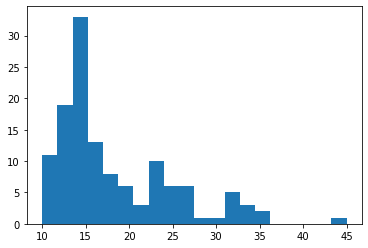

In [1023]:
plt.hist(y_pred_seq_umap, bins=20)

In [1021]:
meld_predictions_umap = pd.concat([pd.DataFrame(data=np.array(X_test_umap), columns=X_umap.columns), pd.DataFrame(data=np.array(y_pred_seq_umap), columns=["MELD_Prediction_UMAP"])], axis=1)

In [1022]:
prediction_accuracy_umap = meld_acc(meld_predictions_umap, meld_column="MELD_Prediction_UMAP")
prediction_accuracy_umap

[0, 0.044444444444444446, 0.4074074074074074, 0.6, 1.0]